## Neual Networks & Deep Learning

### 8.1: Fashion Classification

Dataset:

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

In [ ]:
!pip install tensorflow

In [13]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 23.42 MiB/s, done.
Resolving deltas: 100% (10/10), done.


### 8.2: Tensorflow & Keras

In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
from tensorflow.keras.utils import load_img

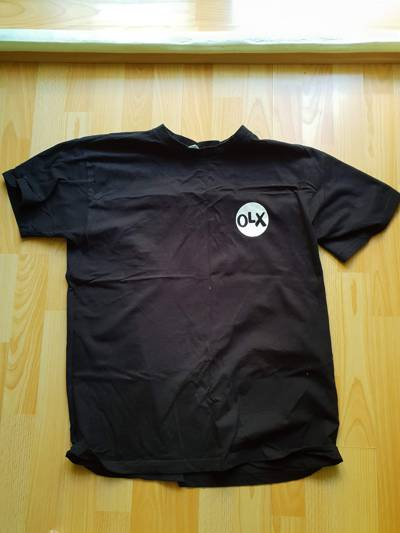

In [ ]:
path = "./clothing-dataset-small/train/t-shirt"
name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
full_path = f"{path}/{name}"
load_img(full_path)

In [ ]:
img = load_img(full_path, target_size=(299, 299))
x = np.array(img)
x.shape

(299, 299, 3)

### 8.3 Pre-trained CNNs

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/

In [3]:
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions

In [ ]:
model = Xception(weights="imagenet", input_shape=(299, 299, 3))

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [ ]:
X = preprocess_input(X)
pred = model.predict(X)
decode_predictions(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', np.float32(0.68196356)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038139977)),
  ('n04370456', 'sweatshirt', np.float32(0.034324735)),
  ('n03710637', 'maillot', np.float32(0.011354207)),
  ('n04525038', 'velvet', np.float32(0.0018453562))]]

### 8.4: CNNs

https://cs231n.github.io/

### 8.5: Transfer Learning

In [11]:
from tensorflow.keras.utils import image_dataset_from_directory

In [14]:
small_train_path = "./clothing-dataset-small/train"
train_ds = image_dataset_from_directory(small_train_path,
                                        labels="inferred",
                                        label_mode="categorical",
                                        image_size=(150, 150),
                                        batch_size=32)

Found 3068 files belonging to 10 classes.


In [ ]:
train_ds.class_names

['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [15]:
small_val_path = "./clothing-dataset-small/validation"
val_ds = image_dataset_from_directory(small_val_path,
                                      labels="inferred",
                                      label_mode="categorical",
                                      image_size=(150, 150),
                                      batch_size=32,
                                      shuffle=False)

Found 341 files belonging to 10 classes.


In [ ]:
base_model = Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(150, 150, 3)
)
base_model.trainable = False

# Extracting vector representation
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(preprocess_input(inputs), training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)

# Adding the dense layer
outputs = keras.layers.Dense(10)(vectors)

# Wraping the entire network into a single model
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 5, 5, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,881,970 (79.66 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.5623 - loss: 1.6049 - val_accuracy: 0.7918 - val_loss: 0.7387
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 340s 4s/step - accuracy: 0.8149 - loss: 0.5791 - val_accuracy: 0.7830 - val_loss: 0.8779
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 381s 4s/step - accuracy: 0.8703 - loss: 0.3499 - val_accuracy: 0.7918 - val_loss: 0.8745
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 386s 4s/step - accuracy: 0.8984 - loss: 0.2539 - val_accuracy: 0.7801 - val_loss: 1.0610
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 379s 4s/step - accuracy: 0.9401 - loss: 0.1703 - val_accuracy: 0.8035 - val_loss: 0.9005
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 341s 4s/step - accuracy: 0.9539 - loss: 0.1229 - val_accuracy: 0.7947 - val_loss: 0.9733
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 384s 4s/step - accuracy: 0.9573 - loss: 0.1137 - val_accuracy: 0.7977 - val_loss: 0.9507
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - accuracy: 0.9816 - loss: 0.0651 - val_accuracy: 0.8094 - v

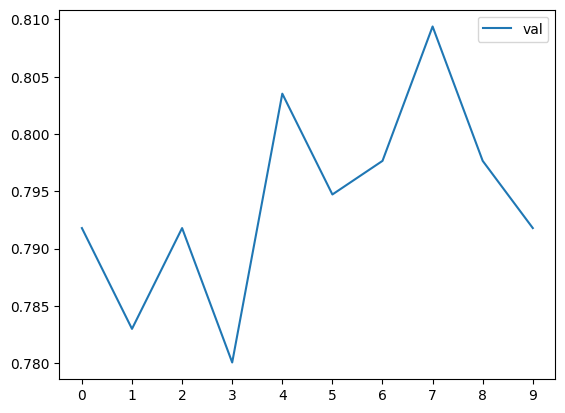

In [ ]:
plt.plot(history.history["val_accuracy"], label="val")
plt.xticks(np.arange(10))
plt.legend()

### 8.6: Adjusting the Learning Rate

In [ ]:
def make_model(learning_rate=0.01):
  # base model
  base_model = Xception(
      weights="imagenet",
      include_top=False,
      input_shape=(150, 150, 3)
  )
  base_model.trainable = False

  # feature map & vector representation
  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(preprocess_input(inputs), training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)

  # logit outputs
  outputs = keras.layers.Dense(10)(vectors)

  # model
  model = keras.Model(inputs, outputs)

  # optimizer & loss
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  # model compilation
  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=["accuracy"]
  )

  return model


In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
  print(lr)

  model = make_model(learning_rate=lr)
  history = model.fit(train_ds, epochs=10, validation_data=val_ds)
  scores[lr] = history.history


0.0001
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 53s 385ms/step - accuracy: 0.2819 - loss: 2.0246 - val_accuracy: 0.5455 - val_loss: 1.5086
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.5620 - loss: 1.3931 - val_accuracy: 0.6393 - val_loss: 1.2017
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.6303 - loss: 1.1480 - val_accuracy: 0.7009 - val_loss: 1.0383
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.6879 - loss: 1.0002 - val_accuracy: 0.7390 - val_loss: 0.9380
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.7128 - loss: 0.8982 - val_accuracy: 0.7537 - val_loss: 0.8697
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.7247 - loss: 0.8399 - val_accuracy: 0.7742 - val_loss: 0.8210
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.7373 - loss: 0.7897 - val_accuracy: 0.7742 - val_loss: 0.7841
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step

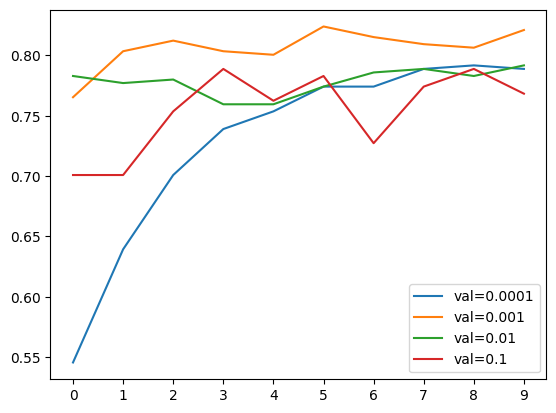

In [ ]:
for lr, hist in scores.items():
  plt.plot(hist["val_accuracy"], label="val=%s" % lr)

plt.xticks(np.arange(10))
plt.legend()

In [ ]:
learning_rate = 0.001

### 8.7: Checkpointing

In [ ]:
model.save_weights("model_v1.weights.h5")

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"
)

In [ ]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5014 - loss: 1.4764

96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 200ms/step - accuracy: 0.5027 - loss: 1.4725 - val_accuracy: 0.7947 - val_loss: 0.7122
Epoch 2/10
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7785 - loss: 0.6442

96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.7786 - loss: 0.6439 - val_accuracy: 0.8094 - val_loss: 0.6196
Epoch 3/10
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8304 - loss: 0.5094

96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.8303 - loss: 0.5095 - val_accuracy: 0.8182 - val_loss: 0.5884
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.8560 - loss: 0.4365 - val_accuracy: 0.8182 - val_loss: 0.5718
Epoch 5/10
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8846 - loss: 0.3771

96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8846 - loss: 0.3770 - val_accuracy: 0.8211 - val_loss: 0.5571
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.8959 - loss: 0.3393 - val_accuracy: 0.8182 - val_loss: 0.5529
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9216 - loss: 0.3050 - val_accuracy: 0.8152 - val_loss: 0.5613
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9312 - loss: 0.2587 - val_accuracy: 0.8211 - val_loss: 0.5512
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.9344 - loss: 0.2438 - val_accuracy: 0.8182 - val_loss: 0.5493
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9425 - loss: 0.2182 - val_accuracy: 0.8211 - val_loss: 0.5438


### 8.8: Adding More Layers

In [1]:
def make_model(learning_rate=0.01, size_inner=100):
  # base model
  base_model = Xception(
      weights="imagenet",
      include_top=False,
      input_shape=(150, 150, 3)
  )
  base_model.trainable = False

  # feature map & vector representation
  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(preprocess_input(inputs), training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)

  # ReLU
  inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

  # logit outputs
  outputs = keras.layers.Dense(10)(vectors)

  # model
  model = keras.Model(inputs, outputs)

  # optimizer & loss
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  # model compilation
  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=["accuracy"]
  )

  return model


In [16]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
  print(size)

  model = make_model(learning_rate=learning_rate, size_inner=size)
  history = model.fit(train_ds, epochs=10, validation_data=val_ds)
  scores[size] = history.history


10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 51s 355ms/step - accuracy: 0.5322 - loss: 1.4266 - val_accuracy: 0.7742 - val_loss: 0.7117
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7666 - loss: 0.6333 - val_accuracy: 0.8035 - val_loss: 0.6328
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.8378 - loss: 0.4981 - val_accuracy: 0.8211 - val_loss: 0.5973
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.8593 - loss: 0.4310 - val_accuracy: 0.8094 - val_loss: 0.5924
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.8930 - loss: 0.3653 - val_accuracy: 0.8270 - val_loss: 0.5525
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9019 - loss: 0.3187 - val_accuracy: 0.8358 - val_loss: 0.5466
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9199 - loss: 0.2792 - val_accuracy: 0.8328 - val_loss: 0.5416
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.9393 - loss: 0.2597 - val_accuracy: 0.8

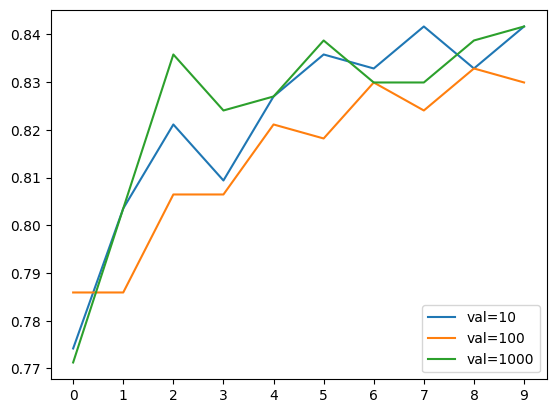

In [17]:
for size, hist in scores.items():
  plt.plot(hist["val_accuracy"], label="val=%s" % size)

plt.xticks(np.arange(10))
plt.legend()

In [22]:
size_inner = 10

### 8.9: Regularization & Dropout

In [18]:
def make_model(learning_rate=0.01, size_inner=100, drop_rate=0.5):
  # base model
  base_model = Xception(
      weights="imagenet",
      include_top=False,
      input_shape=(150, 150, 3)
  )
  base_model.trainable = False

  # feature map & vector representation
  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(preprocess_input(inputs), training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)

  # ReLU
  inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

  # Dropout
  drop = keras.layers.Dropout(drop_rate)(inner)

  # logit outputs
  outputs = keras.layers.Dense(10)(vectors)

  # model
  model = keras.Model(inputs, outputs)

  # optimizer & loss
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  # model compilation
  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=["accuracy"]
  )

  return model


In [19]:
learning_rate = 0.001
size_inner = 10

scores = {}

for dr in [0.0, 0.2, 0.5, 0.8]:
  print(dr)

  model = make_model(learning_rate=learning_rate,
                     size_inner=size_inner,
                     drop_rate=dr)
  history = model.fit(train_ds, epochs=10, validation_data=val_ds)
  scores[dr] = history.history


0.0
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 186ms/step - accuracy: 0.5271 - loss: 1.4279 - val_accuracy: 0.8006 - val_loss: 0.6881
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.7863 - loss: 0.6340 - val_accuracy: 0.8035 - val_loss: 0.6385
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.8320 - loss: 0.5085 - val_accuracy: 0.8152 - val_loss: 0.5794
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.8674 - loss: 0.4285 - val_accuracy: 0.8182 - val_loss: 0.5604
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.8906 - loss: 0.3606 - val_accuracy: 0.8270 - val_loss: 0.5532
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.9036 - loss: 0.3307 - val_accuracy: 0.8152 - val_loss: 0.5566
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9174 - loss: 0.2924 - val_accuracy: 0.8328 - val_loss: 0.5451
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.9325 - loss: 0.2650 - val_accuracy: 0.8

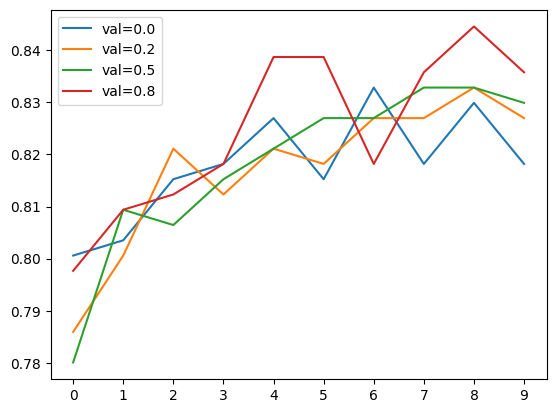

In [20]:
for dr, hist in scores.items():
  plt.plot(hist["val_accuracy"], label="val=%s" % dr)

plt.xticks(np.arange(10))
plt.legend()

In [21]:
drop_rate = 0.5

### 8.10: Data Augmentation

In [23]:
def make_model(learning_rate=0.01, size_inner=100, drop_rate=0.5):
  # base model
  base_model = Xception(
      weights="imagenet",
      include_top=False,
      input_shape=(150, 150, 3)
  )
  base_model.trainable = False

  # feature map
  inputs = keras.Input(shape=(150, 150, 3))

  # augmentation
  augmentation = keras.Sequential([
      keras.layers.RandomFlip("vertical"),
      keras.layers.RandomRotation(0.1),
      keras.layers.RandomZoom(0.1)
  ])

  # preprocessing
  X = preprocess_input(augmentation(inputs))

  # convolution base
  base = base_model(X, training=False)

  # vector representation
  vectors = keras.layers.GlobalAveragePooling2D()(base)

  # relu
  inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

  # dropout
  drop = keras.layers.Dropout(drop_rate)(inner)

  # logit outputs
  outputs = keras.layers.Dense(10)(vectors)

  # model
  model = keras.Model(inputs, outputs)

  # optimizer & loss
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  # model compilation
  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=["accuracy"]
  )

  return model


In [24]:
learning_rate = 0.001
size_inner = 10
drop_rate = 0.5

model = make_model(learning_rate=learning_rate,
                    size_inner=size_inner,
                    drop_rate=drop_rate)
history = model.fit(train_ds, epochs=10, validation_data=val_ds)



Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 120ms/step - accuracy: 0.3967 - loss: 1.8185 - val_accuracy: 0.6862 - val_loss: 0.9413
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.6479 - loss: 1.0645 - val_accuracy: 0.7507 - val_loss: 0.8240
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.6789 - loss: 0.9577 - val_accuracy: 0.7419 - val_loss: 0.7771
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.7069 - loss: 0.8627 - val_accuracy: 0.7654 - val_loss: 0.7499
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.7166 - loss: 0.8445 - val_accuracy: 0.7566 - val_loss: 0.7515
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.7324 - loss: 0.7885 - val_accuracy: 0.7830 - val_loss: 0.7303
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.7353 - loss: 0.7779 - val_accuracy: 0.7654 - val_loss: 0.7380
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.7510 - loss: 0.7562 - val_accuracy: 0.7537 -

In [25]:
learning_rate = 0.001
size_inner = 10
drop_rate = 0.5

model = make_model(learning_rate=learning_rate,
                    size_inner=size_inner,
                    drop_rate=drop_rate)
history = model.fit(train_ds, epochs=20, validation_data=val_ds)



Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.4119 - loss: 1.7787 - val_accuracy: 0.6979 - val_loss: 0.9271
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.6426 - loss: 1.0634 - val_accuracy: 0.7243 - val_loss: 0.8007
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.6973 - loss: 0.9325 - val_accuracy: 0.7566 - val_loss: 0.7775
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.7119 - loss: 0.8709 - val_accuracy: 0.7537 - val_loss: 0.7437
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.7161 - loss: 0.8303 - val_accuracy: 0.7625 - val_loss: 0.7477
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.7304 - loss: 0.7957 - val_accuracy: 0.7683 - val_loss: 0.6991
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.7418 - loss: 0.7604 - val_accuracy: 0.7595 - val_loss: 0.7392
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.7553 - loss: 0.7167 - val_accuracy: 0.7742 

In [26]:
learning_rate = 0.001
size_inner = 10
drop_rate = 0.5

model = make_model(learning_rate=learning_rate,
                    size_inner=size_inner,
                    drop_rate=drop_rate)
history = model.fit(train_ds, epochs=30, validation_data=val_ds)



Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.4404 - loss: 1.6983 - val_accuracy: 0.7185 - val_loss: 0.8701
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.6473 - loss: 1.0660 - val_accuracy: 0.7537 - val_loss: 0.8156
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.6721 - loss: 0.9608 - val_accuracy: 0.7654 - val_loss: 0.7733
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.6983 - loss: 0.8981 - val_accuracy: 0.7654 - val_loss: 0.7421
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.7290 - loss: 0.8150 - val_accuracy: 0.7713 - val_loss: 0.7304
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.7397 - loss: 0.7894 - val_accuracy: 0.7654 - val_loss: 0.7500
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.7498 - loss: 0.7718 - val_accuracy: 0.7478 - val_loss: 0.7523
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.7516 - loss: 0.7381 - val_accuracy: 0.7683 -

In [27]:
def make_model(learning_rate=0.01, size_inner=100, drop_rate=0.5):
  # base model
  base_model = Xception(
      weights="imagenet",
      include_top=False,
      input_shape=(150, 150, 3)
  )
  base_model.trainable = False

  # feature map
  inputs = keras.Input(shape=(150, 150, 3))

  # augmentation
  augmentation = keras.Sequential([
      keras.layers.RandomFlip("vertical")
  ])

  # preprocessing
  X = preprocess_input(augmentation(inputs))

  # convolution base
  base = base_model(X, training=False)

  # vector representation
  vectors = keras.layers.GlobalAveragePooling2D()(base)

  # relu
  inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

  # dropout
  drop = keras.layers.Dropout(drop_rate)(inner)

  # logit outputs
  outputs = keras.layers.Dense(10)(vectors)

  # model
  model = keras.Model(inputs, outputs)

  # optimizer & loss
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  # model compilation
  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=["accuracy"]
  )

  return model


In [28]:
learning_rate = 0.001
size_inner = 10
drop_rate = 0.5

model = make_model(learning_rate=learning_rate,
                    size_inner=size_inner,
                    drop_rate=drop_rate)
history = model.fit(train_ds, epochs=10, validation_data=val_ds)



Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 181ms/step - accuracy: 0.4503 - loss: 1.6734 - val_accuracy: 0.7625 - val_loss: 0.8170
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.7224 - loss: 0.8558 - val_accuracy: 0.7742 - val_loss: 0.7354
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.7477 - loss: 0.7381 - val_accuracy: 0.7771 - val_loss: 0.6830
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.7863 - loss: 0.6338 - val_accuracy: 0.7977 - val_loss: 0.6580
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.8190 - loss: 0.5581 - val_accuracy: 0.7947 - val_loss: 0.6470
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8202 - loss: 0.5275 - val_accuracy: 0.8094 - val_loss: 0.6178
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.8323 - loss: 0.4996 - val_accuracy: 0.7947 - val_loss: 0.6089
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.8533 - loss: 0.4657 - val_accuracy: 0.8006 

### 8.11: Training Larger Model

In [44]:
input_size = 299

small_train_path = "./clothing-dataset-small/train"
train_ds = image_dataset_from_directory(small_train_path,
                                        labels="inferred",
                                        label_mode="categorical",
                                        image_size=(input_size, input_size),
                                        batch_size=32)
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))

small_val_path = "./clothing-dataset-small/validation"
val_ds = image_dataset_from_directory(small_val_path,
                                        labels="inferred",
                                        label_mode="categorical",
                                        image_size=(input_size, input_size),
                                        batch_size=32,
                                        shuffle=False)
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))

Found 3068 files belonging to 10 classes.
Found 341 files belonging to 10 classes.


In [45]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"
)

In [46]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, drop_rate=0.5):
  # base model
  base_model = Xception(
      weights="imagenet",
      include_top=False,
      input_shape=(input_size, input_size, 3)
  )
  base_model.trainable = False

  # feature map
  inputs = keras.Input(shape=(input_size, input_size, 3))

  # augmentation
  augmentation = keras.Sequential([
      keras.layers.RandomFlip("vertical")
  ])
  augmented_inputs = augmentation(inputs)

  # convolution base
  base = base_model(augmented_inputs, training=False)

  # vector representation
  vectors = keras.layers.GlobalAveragePooling2D()(base)

  # relu
  inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

  # dropout
  drop = keras.layers.Dropout(drop_rate)(inner)

  # logit outputs
  outputs = keras.layers.Dense(10)(vectors)

  # model
  model = keras.Model(inputs, outputs)

  # optimizer & loss
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  # model compilation
  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=["accuracy"]
  )

  return model


In [47]:
input_size = 299
learning_rate = 0.001
size_inner = 10
drop_rate = 0.5

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size_inner,
    drop_rate=drop_rate
)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.4877 - loss: 1.6263

96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 627ms/step - accuracy: 0.4891 - loss: 1.6224 - val_accuracy: 0.8182 - val_loss: 0.7028
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.7440 - loss: 0.8032

96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 302ms/step - accuracy: 0.7443 - loss: 0.8025 - val_accuracy: 0.8299 - val_loss: 0.5485
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.7922 - loss: 0.6545

96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 291ms/step - accuracy: 0.7924 - loss: 0.6540 - val_accuracy: 0.8475 - val_loss: 0.5028
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 278ms/step - accuracy: 0.7936 - loss: 0.6024 - val_accuracy: 0.8387 - val_loss: 0.4719
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.8291 - loss: 0.5308

96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 290ms/step - accuracy: 0.8292 - loss: 0.5306 - val_accuracy: 0.8592 - val_loss: 0.4443
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.8393 - loss: 0.4922

96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 292ms/step - accuracy: 0.8394 - loss: 0.4920 - val_accuracy: 0.8622 - val_loss: 0.4285
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 281ms/step - accuracy: 0.8461 - loss: 0.4666 - val_accuracy: 0.8534 - val_loss: 0.4202
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 286ms/step - accuracy: 0.8610 - loss: 0.4380 - val_accuracy: 0.8563 - val_loss: 0.4165
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 285ms/step - accuracy: 0.8642 - loss: 0.4330 - val_accuracy: 0.8504 - val_loss: 0.4109
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 283ms/step - accuracy: 0.8753 - loss: 0.4025 - val_accuracy: 0.8475 - val_loss: 0.4055


### 8.12: Using the Model

In [36]:
import tensorflow as tf
from tensorflow import keras

In [55]:
from tensorflow.keras.utils import image_dataset_from_directory, load_img
from tensorflow.keras.applications.xception import preprocess_input

In [50]:
input_size = 299

small_test_path = "./clothing-dataset-small/test"
test_ds = image_dataset_from_directory(small_test_path,
                                        labels="inferred",
                                        label_mode="categorical",
                                        image_size=(input_size, input_size),
                                        batch_size=32,
                                        shuffle=False)
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

Found 372 files belonging to 10 classes.


In [48]:
model = keras.models.load_model("/content/xception_v4_06_0.862.h5")

In [51]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step - accuracy: 0.8443 - loss: 0.4515


[0.36027321219444275, 0.8790322542190552]

In [56]:
path = "./clothing-dataset-small/test/pants/05814dc4-0520-47e6-91e0-402a971ba40a.jpg"

img = load_img(path, target_size=(299, 299))

In [57]:
import numpy as np

In [58]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [59]:
X = preprocess_input(X)

pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step


In [62]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [63]:
dict(zip(classes, pred[0]))

{'dress': np.float32(-3.0513706),
 'hat': np.float32(-5.6328764),
 'longsleeve': np.float32(-1.1084917),
 'outwear': np.float32(-1.7558457),
 'pants': np.float32(4.255017),
 'shirt': np.float32(-0.9227264),
 'shoes': np.float32(-4.140314),
 'shorts': np.float32(0.82614124),
 'skirt': np.float32(-3.6120856),
 't-shirt': np.float32(-4.8380876)}